# Machine Learning 2021
## Laboratorio 1: Regresión Lineal (máxima verosimilitud/mínimos cuadrados)

In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Generación de datos
El siguiente bloque define dos sistemas con ruido. En cada caso, el parámetro sigma controla el nivel ruido.

In [38]:
def sistema1(x,sigma = 0.5):
  a = 0.5
  b = 1
  y = a*x + b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t

def sistema2(x,sigma = 0.05):
  a = 0.001
  b = 1
  y = a*pow(x-2,3)+b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t

def sistema3(x,sigma=1):
  a = 0.001
  b = 0.01 
  c = 0.1
  d = 5
#  y = a*np.sin(x)/x
  y = a*x**3 + b*x**2 + c*x + d
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t,y

El siguiente bloque define funciones para graficar el resultado de los modelos construidos

In [41]:
def plot_linear(input,target,predicted):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(input, target,  label='data')
  plt.plot(input, predicted, color='red',label='predicted')
  plt.xlabel('Input variable ($x$)')
  plt.ylabel('Output variable ($t$)')
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(target, predicted)
  plt.plot([min(target),max(target)],[min(target),max(target)])
  plt.xlabel('Target ($t$)')
  plt.ylabel('Predicted ($y$)')
  plt.axis('equal')
  plt.xlim([min(target),max(target)])
  plt.ylim([min(target),max(target)])
  plt.show()

def plot_train_test(x_train,t_train,y_train,x_test,y_test):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(x_train, t_train, label="Train data")    
  plt.plot(x_test, y_test, color='red', label="Predicted test")
  plt.ylim([min(t_train),max(t_train)])
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(t_train, y_train)
  plt.plot([min(t_train),max(t_train)],[min(t_train),max(t_train)])
  plt.xlabel('Target ($t$)')
  plt.ylabel('Predicted ($y$)')
  plt.axis('equal')
  plt.xlim([min(t_train),max(t_train)])
  plt.ylim([min(t_train),max(t_train)])
  plt.show()

def plot_train_test_G(x_train,t_train,y_train,x_test,t_test,y_test,d):
  plt.figure(figsize=(5,5))

  plt.scatter(x_train, t_train, label="Train data")
  plt.plot(x_test, t_test, color='green', label="Noise free test data")
  plt.plot(x_test, y_test, color='red', label="Predicted test")
  plt.legend()
  plt.title('Degree {0}'.format(d))
  plt.show()

El siguiente bloque define un arreglo de valores con distribución uniforme ($x$) y calcula la salida del sistema uno ($t$) para cada valor 

X: (100, 1) t: (100, 1)
Number of samples: 100


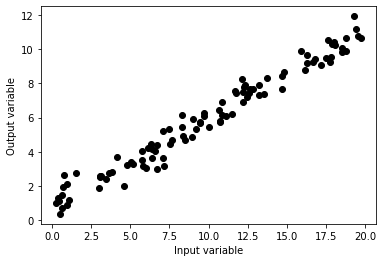

In [ ]:
N = 100 # número de muestras a generar
x_init = 0
x_end = 20
X_train = np.random.uniform(x_init,x_end,(N,1))

t_train = sistema1(X_train)
print('X:',X_train.shape,'t:',t_train.shape)
print('Number of samples:',t_train.shape[0])

plt.scatter(X_train, t_train,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.show()

**A.** Use el modelo de regresión lineal descrito en clase para construir $y(x)=w_1x+w_0$. 

*   Complete la función  ``` linear_1d_predict ``` siendo ```X``` un tensor de tamaño ```(N,1)``` y ```w``` un tensor de ```(2,1)```. El resultado ```y``` debe ser un tensor de ```(N,1)```. Tip: $\mathbf{y}=\mathbf{\Phi}\mathbf{w}$ y $\mathbf{\Phi}=[1 | \mathbf{X}]$


*   Complete la función  ``` linear_1d_fit ``` de aprendizaje de los parámetros $\mathbf{w}$ siendo ```X``` y ```t``` tensores de tamaño ```(N,1)```. El resultado ```w``` debe ser un tensor de ```(2,1)```. Tip: $\mathbf{w}_{ML}=\mathbf{\Phi}^\dagger \mathbf{t}$


¿Su regresion se ajusta bien a sus datos?

w debe ser un array de tamaño (2,1). El suyo es de tamaño (2, 1)
y debe ser un array de tamaño (100,1). El suyo es de tamaño (100, 1)


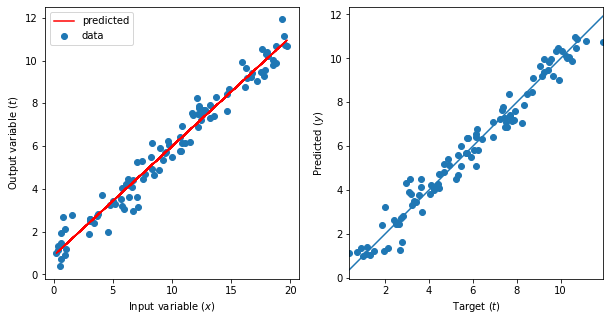

In [ ]:
def linear_1d_predict(X,w): #Phi=[1,X]
  #Reemplace el resultado de 'y' por la ecuación del modelo lineal
  Phi = np.concatenate([np.ones(X.shape),X],axis=1)
  y = Phi@w
  return y

def linear_1d_fit(X,t):
  #Reemplace el resultado de 'w' por la solución de mínimos cuadrados para los parámetros
  Phi = np.concatenate([np.ones(X.shape),X],axis=1)
  w = np.linalg.pinv(Phi)@t
  return w

#Train the model
w = linear_1d_fit(X_train,t_train)
print('w debe ser un array de tamaño (2,1). El suyo es de tamaño',w.shape)

#Predict with the model
y_own = linear_1d_predict(X_train,w)
print('y debe ser un array de tamaño ({0},1). El suyo es de tamaño {1}'.format(X_train.shape[0],y_own.shape))

plot_linear(X_train,t_train,y_own)

**B.** Consulte cómo usar el regresor lineal implementado en scikit (`LinearRegression` en `linear_model`) y aplíquelo para el problema de regresión anterior. El resultado de la regresión se debe guardar en la variable `y_sk` para graficar. Compare los resultados de su implementación y del toolbox scikit. 



* Qué hay en el atributo `coef_`?
* Qué hay en el atributo `intercept_`?
* Qué hace el método `score`?
* Son iguales los resultados `y_sk` y `y_own`?

w: [[0.511317]]
w_0: [0.86911185]
R2: 0.9669055221513518


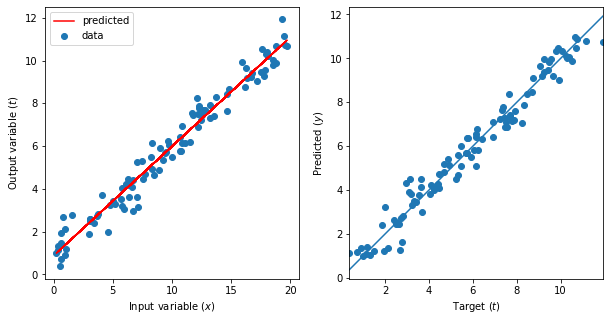

In [ ]:
#Reemplace el resultado de 'y_sk' con el resultado de la predicción empleando scikit.
regresor_lineal = LinearRegression().fit(X_train, t_train) 
y_sk = regresor_lineal.predict(X_train)

#Reemplace el resultado de 'w_sk' por el contenido del atributo coef_ de su modelo.
w_sk = regresor_lineal.coef_

#Reemplace el resultado de 'w0_sk' por el contenido del atributo intercept_ de su modelo.
w0_sk = regresor_lineal.intercept_

#Reemplace el resultado de 'score' por el resultado de invocar el método score de su modelo con 'x' y 't'.
score = regresor_lineal.score(X_train, t_train)

print('w:',w_sk)
print('w_0:',w0_sk)
print('R2:',score)

plot_linear(X_train,t_train,y_sk)

**C.** El siguiente bloque define un arreglo de valores con distribución uniforme ($x$) y calcula la salida del sistema dos ($t$) para cada valor. ¿Considera que construir un regresor de la misma forma que para el sistema uno ajustaría bien las muestras?

R// Según el grafico no parece que un modelo lineal se ajustara bien a nuestros datos dado que presentan una forma curva.

X_train: (50, 1) t_train: (50, 1)


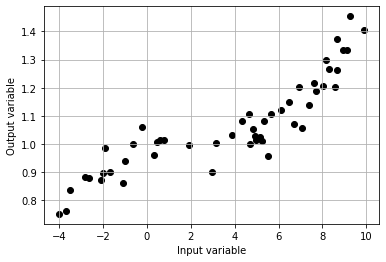

In [ ]:
X_train = np.sort(np.random.uniform(-4,10,(50,1)),axis=0)
t_train = sistema2(X_train)
print('X_train:',X_train.shape,'t_train:',t_train.shape)
plt.scatter(X_train,t_train,color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

**D.** Aplique el regresor lineal de scikit para ajustar los datos del sistema dos. El resultado de la regresión se debe guardar en la variable `y_lineal` para graficar. Compare los resultados de su implementación y del toolbox scikit. ¿Su regresion se ajusta bien a sus datos?

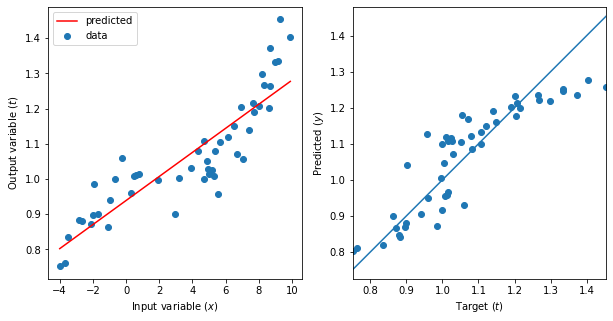

In [ ]:
#%% Reemplace el resultado de 'y_lineal' por el resultado de su regresor lineal
regresor_lineal = LinearRegression().fit(X_train, t_train)
y_lineal = regresor_lineal.predict(X_train)
#%%
plot_linear(X_train,t_train,y_lineal)

**E.** Consulte cómo usar características polinomiales como funciones base $\phi(x)=\{x^n:n=0...P\}$,$\phi(x)\in\mathbb{R}^{P+1}$ (`PolinomialFeatures` en `sklearn.preprocessing`) y aplíquelas para el problema de regresión anterior. Las características polinomiales se deben guardar en la variable `Phi_train`. El resultado de la regresión se debe guardar en la variable `y_train` para graficar. ¿Mejora o no el resultado de la regresión? ¿Cómo afecta el grado del polinomio ($P$) el resultado de la regresión?

X_train: (50, 1) Polinomial: (50, 5)


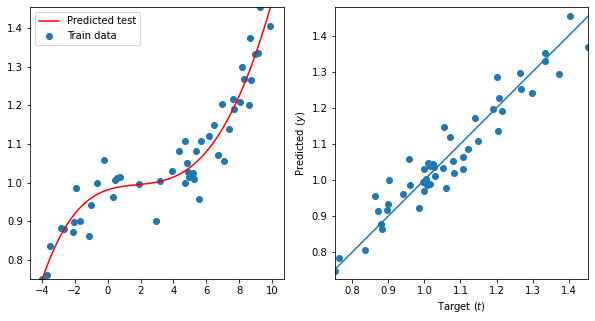

In [ ]:
#%% Reemplace el resultado de 'Phi_train' por las características polinomiales con los datos de train
polynomial_features = PolynomialFeatures(4)
Phi_train = polynomial_features.fit_transform(X_train)
print('X_train:',X_train.shape,'Polinomial:',Phi_train.shape)

#A continuación se crea una malla linealmente espaciada como datos de entrada de prueba:
X_test = np.linspace(-4,10,200).reshape(-1,1)

#%% Reemplace el resultado de 'Phi_test' por las características polinomiales con los datos de test
Phi_test = polynomial_features.fit_transform(X_test)

regresor_lineal = LinearRegression().fit(Phi_train, t_train)
#%% Reemplace el resultado de 'y_train' por el resultado de su regresor lineal en los datos de train
y_train = regresor_lineal.predict(Phi_train)

#%% Reemplace el resultado de 'y_test' por el resultado de su regresor lineal en los datos de test
y_test = regresor_lineal.predict(Phi_test)

#%%
plot_train_test(X_train,t_train,y_train,X_test,y_test)

**F.** Consulte cómo usar funciones de base radial (RBF) como funciones base  $\phi_p(x)=\exp(-(x-\mu_p)^2/(2\sigma^2))$ (`sklearn.metrics.pairwise.rbf_kernel` y `sklearn.preprocessing.FunctionTransformer`) y aplíquelas para el problema de regresión anterior. 

* Los centroides se seben guardar en la variable `mu`.
* Use un malla de valores linealmente espaciados entre el mínimo y el máximo de la variable de entrada. 
* El resultado de la RBF se debe guardar en la variable `Phi`.
* El resultado de la regresión se debe guardar en la variable `y` para graficar. 

* ¿Cómo afecta la cantidad de centroides el resultado de la regresión? 
* ¿Cómo afecta el parámetro escala ($\sigma$) el resultado de la regresión?  

* ¿Escogería funciones polinomiales o funciones de base radial (RBF) para este modelo de regresión?

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel 
from ipywidgets import interact, interactive

#%% Reemplace el resultado de 'mu' por la malla de valores linealmente espaciados

def rbf_model_plot(centroids,sigma):
  def rbf(X):
    gamma = 1/(2*sigma**2)
    mu = np.linspace(-4,10,centroids).reshape(-1,1)
    return rbf_kernel(X,mu,gamma)

  transform = FunctionTransformer(rbf)

  #%% Reemplace el resultado de 'Phi_train' por las características RBF con los datos de train

  Phi_train = transform.transform(X_train)
  print('X_train:',X_train.shape,'RBF:',Phi_train.shape)

  #A continuación se crea una malla linealmente espaciada como datos de entrada de prueba:
  X_test = np.linspace(-4,10,200).reshape(-1,1)

  #%% Reemplace el resultado de 'Phi_test' por las características RBF con los datos de test
  Phi_test = transform.transform(X_test)

  #%% Reemplace el resultado de 'y_train' por el resultado de su regresor lineal en los datos de train
  mdl = LinearRegression().fit(Phi_train,t_train)

  y_train = mdl.predict(Phi_train)

  #%% Reemplace el resultado de 'y_test' por el resultado de su regresor lineal en los datos de test
  y_test = mdl.predict(Phi_test)

  #%%
  plot_train_test(X_train,t_train,y_train,X_test,y_test)

interactive_plot = interactive(rbf_model_plot,centroids=(1,100,1), sigma=(1,10,0.5))
interactive_plot

interactive(children=(IntSlider(value=50, description='centroids', min=1), FloatSlider(value=5.0, description=…

**G.** En el siguiente bloque se crean los datos del sistema3. Aplique una regresión lineal usando bases polinomiales usando $P\in\{1,5,10,15,20,25\}$. Entrene los diferentes modelos con las variables $x$ y $y$, estime las salidas para `X_test` y guarde esta como `y_test`. Para cada caso visualice el modelo estimado, el modelo real y las muestras utilizadas para el entrenamiento. ¿Qué sucede cuando P crece?. ¿Mejora la regresión cuando sube el número de bases?



X_train: (10, 1) t_train: (10, 1)
Number of samples: 10


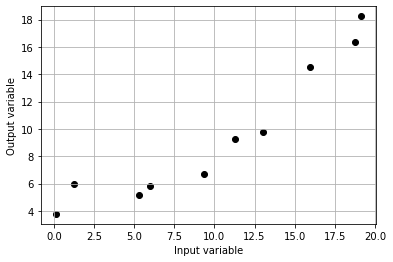

In [39]:
N = 10 # número de muestras a generar
x_init = 0
x_end = 20
X_train = np.random.uniform(x_init,x_end,(N,1))

t_train,_ = sistema3(X_train)
print('X_train:',X_train.shape,'t_train:',t_train.shape)
print('Number of samples:',t_train.shape[0])

plt.scatter(X_train, t_train,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

(10, 2) (10, 1)


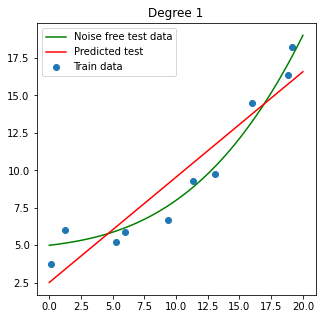

(10, 6) (10, 1)


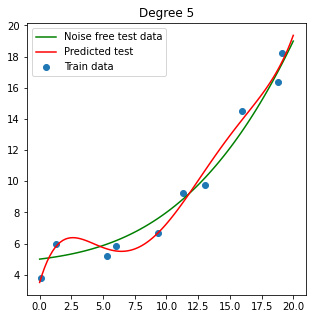

(10, 11) (10, 1)


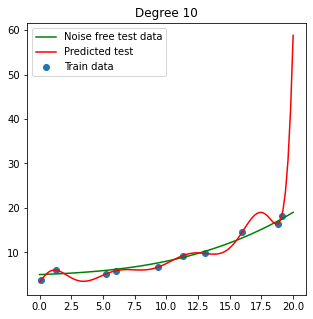

(10, 16) (10, 1)


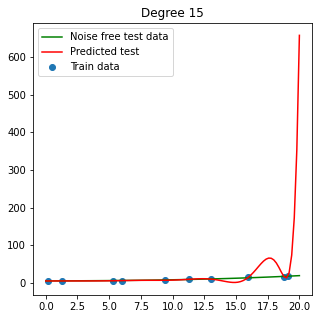

(10, 21) (10, 1)


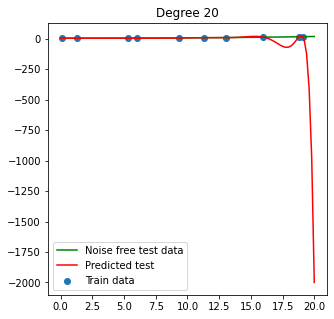

(10, 26) (10, 1)


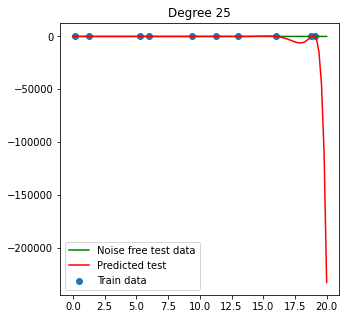

In [43]:
X_test = np.linspace(x_init, x_end, 100).reshape(-1,1)
_,t_test = sistema3(X_test,sigma=1)

#Reemplace los elementos de la lista 'degrees' por la lista de grados del polinomio a evaluar
degrees = [1,5,10,15,20,25]

for degree in degrees:
  
  # A continuación cree su modelo de regresión, prediga el resultado para los 
  # datos de train y test, y reemplacelos en  'y_train' y 'y_test'.
  #
  # NOTA: Use la variable 'degree' para el grado del polinomio
  
  polynomial_features = PolynomialFeatures(degree)
  Phi_train = polynomial_features.fit_transform(X_train)
  Phi_test = polynomial_features.fit_transform(X_test)
  print(Phi_train.shape, t_train.shape)
  linear_regresor = LinearRegression().fit(Phi_train, t_train)
  
  y_train = linear_regresor.predict(Phi_train)
  y_test = linear_regresor.predict(Phi_test)

  #%%
  plot_train_test_G(X_train,t_train,y_train,X_test,t_test,y_test,degree)

**H.** Cargue los datos `california_housing_train` y `california_housing_test`. Entrene un modelo lineal de scikit-learn con los datos de train para predecir la variable `median_house_value` a partir de las otras 8 variables. Evalúe la calidad de su regresor usando los datos de test. 

Ayudas:

*   Consulte los métodos `predict` y `score`.
*   Haga un scatter de las salidas esperadas contra las predicciones.



In [6]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


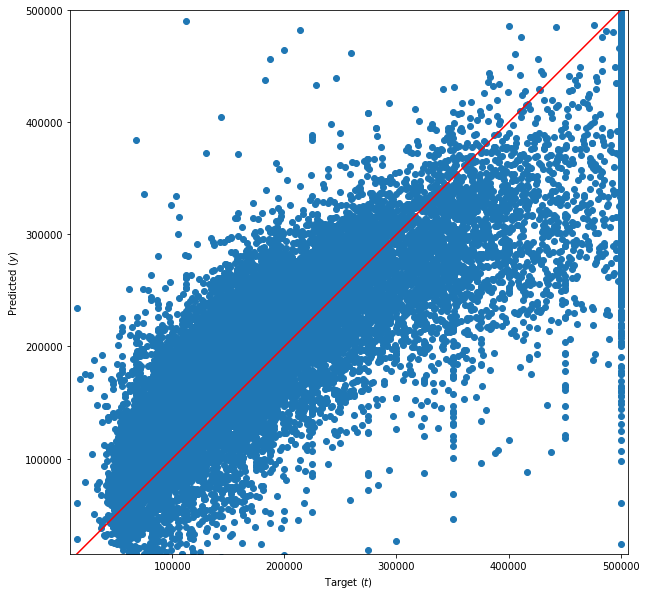

0.6413378529502686


In [63]:
def generic_plot(t_train, y_train):
  plt.figure(figsize=(10, 10))
  plt.scatter(t_train, y_train)
  plt.plot([min(t_train),max(t_train)],[min(t_train),max(t_train)], color='red')
  plt.xlabel('Target ($t$)')
  plt.ylabel('Predicted ($y$)')
  plt.axis('equal')
  plt.xlim([min(t_train),max(t_train)])
  plt.ylim([min(t_train),max(t_train)])
  plt.show()

# processing dataframe
X_train = df[[
              'longitude',
              'latitude',
              'housing_median_age',
              'total_rooms',
              'total_bedrooms',
              'population',
              'households',
              'median_income'
            ]].to_numpy()
t_train = df['median_house_value'].to_numpy()

# train model
linear_regresor = LinearRegression().fit(X_train,t_train)

# caculating score
score = linear_regresor.score(X_train,t_train)

# generate prediction
y_train = linear_regresor.predict(X_train)

# plotting
generic_plot(t_train, y_train)

print(score)